## Test du module AutoEncodeur

In [2]:
import sys
sys.path.insert(0, '../src')

from loss.BCELoss import BCELoss
from loss.CELoss import CELoss
from loss.MSELoss import MSELoss
from activation.TanH import TanH
from activation.Sigmoide import Sigmoide
from activation.Softmax import Softmax
from Linear import Linear
from Optim import SGD
from Sequentiel import Sequentiel
from sklearn.preprocessing import StandardScaler
import random
import time
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from mltools import plot_data, plot_frontiere, make_grid, gen_arti
from termcolor import colored
import tensorflow as tf
import sys
import pandas as pd

In [3]:
# TEST SUR USPS

def load_usps(fn):
    with open(fn, "r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split()) > 2]
    tmp = np.array(data)
    return tmp[:, 1:], tmp[:, 0].astype(int)

def onehot(y):
    onehot = np.zeros((y.size, y.max() + 1))
    onehot[np.arange(y.size), y] = 1
    return onehot

In [4]:
def main_autoEncoder_debruitage(p=0.5, max_iter = 100):
    nom_fichier_train =  "data/mnist_train.csv"
    nom_fichier_test =  "data/mnist_test.csv"
    data_train =  pd.read_csv(nom_fichier_train).to_numpy()
    data_test =  pd.read_csv(nom_fichier_test).to_numpy()
    alltrainx,alltrainy = data_train[:,1:].astype('float32') , data_train[:,0]
    alltestx, alltesty = data_test[:,1:].astype('float32') , data_test[:,0]
    

    alltrainx = alltrainx[0:10000]


    # normalisation des données
    alltrainx /= 255
    alltestx /= 255

    #bruit 
    noise_factor = p
    X_train_noise = alltrainx + noise_factor * \
        tf.random.normal(shape=alltrainx.shape).numpy()
    
    n = 7
    
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_train_noise[i].reshape(28, 28))
        plt.gray()
    plt.show()

    iteration = max_iter
    eps = 1e-3
    batch_size = 20

    l1 = Linear(X_train_noise.shape[1], 100)
    l2 = Linear(100, 10)
    l3 = Linear(10, 100)
    l4 = Linear(100, X_train_noise.shape[1])
    l3._parameters = l2._parameters.T.copy()
    l4._parameters = l1._parameters.T.copy()

    encoder = Sequentiel(l1, TanH(), l2, TanH())
    decoder = Sequentiel(l3, TanH(), l4, Sigmoide())
    model = Sequentiel(encoder, decoder)
    loss = BCELoss()
    opt = SGD(model, loss, X_train_noise, X_train_noise,
              batch_size, nbIter=iteration, eps=eps)
    opt.update()

    predict = model.forward(X_train_noise)
    losss = loss.forward(alltrainx,predict)
    print("erreur",losss.mean())

    
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(predict[i].reshape(28, 28))
        plt.gray()
    plt.show()

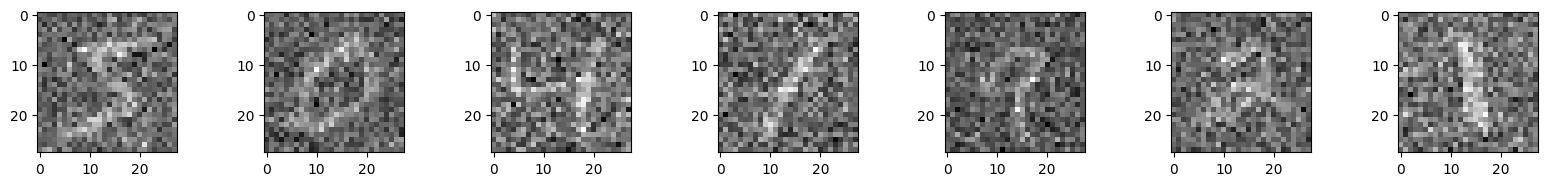

100%|██████████| 100/100 [03:16<00:00,  1.97s/it]


erreur 0.2860470618268888


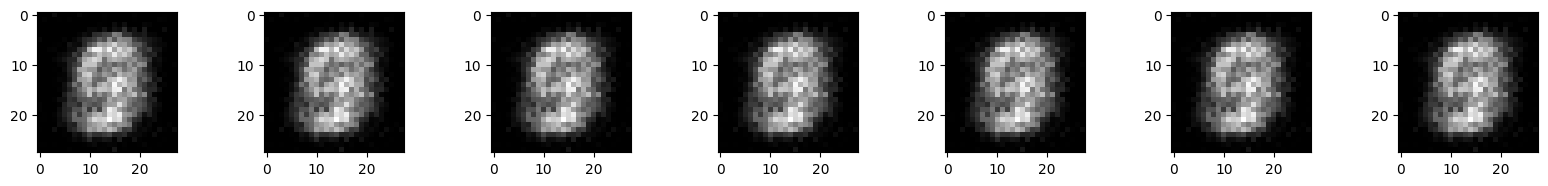

In [8]:
main_autoEncoder_debruitage()

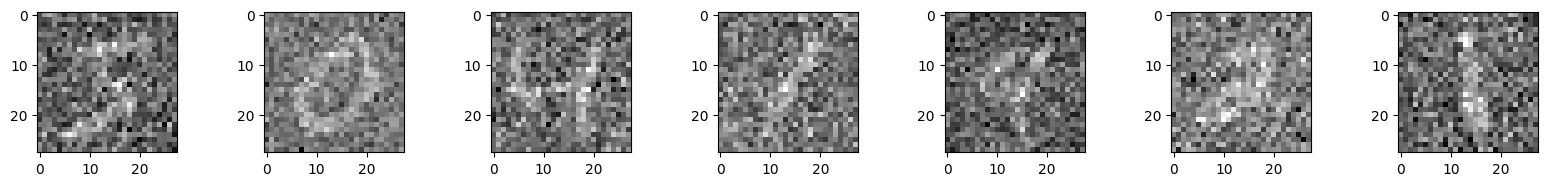

100%|██████████| 500/500 [16:20<00:00,  1.96s/it]


erreur 0.2918781083276206


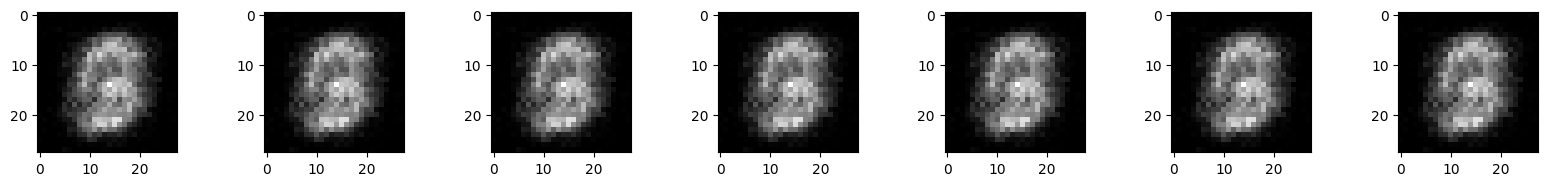

In [5]:
main_autoEncoder_debruitage(max_iter = 500)